# Data Collection and Cleaning

For the step 1 of the project we need to collect Tweets from 3 republican and 3 democrat politicans + Donald Trump.  In order to do this we will use the twitter API and Tweepy to scrap all tweets shown on their twitter for the last 7 days or the last 200 tweets (Whichever ends first).  

In [1]:
import os 
import pandas as pd
import tweepy
import numpy as np
"""
consumer_key = "qxIco9GMu995RC37Zpq7dixFT"
consumer_secret = "qhtYn7SAHr1fyw8a2R0Su98CNIIw3PDtz2xx76Q0YwFK4O42IG"
politican = ['Trump','Biden','Sanders','Warren','McConell','Cruz','Pence']
username = ['realdonaldtrump', 'JoeBiden', 'BernieSanders', 'SenWarren', 'senatemajldr', 'SenTedCruz','VP']

def get_politican_tweet(username, number_of_tweets):
    auth = tweepy.OAuthHandler(consumer_key, consumer_secret) 
    # Calling api 
    api = tweepy.API(auth) 
    tweets = api.user_timeline(screen_name=username, count = number_of_tweets) 
    tmp=[]  
    tweets_for_csv = [tweet.text for tweet in tweets] # CSV file created  
    for j in tweets_for_csv:     
        # Appending tweets to the empty array tmp 
        tmp.append(j)  
    return tmp
    # Printing the tweets 

final_df = pd.DataFrame()

for name, twitter_name in zip(politican,username):
    tweet = get_politican_tweet(twitter_name, 200)
    temp_df = pd.DataFrame({'tweet':tweet})
    temp_df['politican'] = name
    final_df = final_df.append(temp_df)
final_df
"""


'\nconsumer_key = "qxIco9GMu995RC37Zpq7dixFT"\nconsumer_secret = "qhtYn7SAHr1fyw8a2R0Su98CNIIw3PDtz2xx76Q0YwFK4O42IG"\npolitican = [\'Trump\',\'Biden\',\'Sanders\',\'Warren\',\'McConell\',\'Cruz\',\'Pence\']\nusername = [\'realdonaldtrump\', \'JoeBiden\', \'BernieSanders\', \'SenWarren\', \'senatemajldr\', \'SenTedCruz\',\'VP\']\n\ndef get_politican_tweet(username, number_of_tweets):\n    auth = tweepy.OAuthHandler(consumer_key, consumer_secret) \n    # Calling api \n    api = tweepy.API(auth) \n    tweets = api.user_timeline(screen_name=username, count = number_of_tweets) \n    tmp=[]  \n    tweets_for_csv = [tweet.text for tweet in tweets] # CSV file created  \n    for j in tweets_for_csv:     \n        # Appending tweets to the empty array tmp \n        tmp.append(j)  \n    return tmp\n    # Printing the tweets \n\nfinal_df = pd.DataFrame()\n\nfor name, twitter_name in zip(politican,username):\n    tweet = get_politican_tweet(twitter_name, 200)\n    temp_df = pd.DataFrame({\'tweet\'

The Data looks good, lets save it first

In [2]:
os.getcwd()
one_level_up = os.path.dirname(os.getcwd())
#final_df.to_csv(one_level_up + '\\data\\0729raw_tweets.csv')
final_df = pd.read_csv(one_level_up + '\\data\\raw\\raw_tweets.csv', index_col= 0)
final_df

tweet politican
0    RT @realDonaldTrump: Will be interviewed by @s...     Trump
1                              https://t.co/gPAHGxgLKN     Trump
2    Will be interviewed by @seanhannity tonight at...     Trump
3       WELCOME BACK BASEBALL! https://t.co/dhLSfNkI7L     Trump
4    RT @WhiteHouse: LIVE: President @realDonaldTru...     Trump
..                                                 ...       ...
195  RT @Mike_Pence: Proud to work hand-in-hand wit...     Pence
196  RT @SecondLady: #MoreThanEverBefore people are...     Pence
197  RT @Mike_Pence: Insightful and thoughtful meet...     Pence
198  RT @Mike_Pence: Today is a Historic Day for ou...     Pence
199  RT @WhiteHouse: Today, President @realDonaldTr...     Pence

[1400 rows x 2 columns]

Now we have all the data lets add in additional columns that may or may not helps us with out analysis.  Lets add in their party affiliation, and whether if those tweets are retweets or not

In [3]:
party = {'Trump':'R','Biden':'D','Sanders':'D','Warren':'D','McConell':'R','Cruz':'R','Pence':'R'}
final_df['party'] = final_df.politican.map(party)
final_df['retweet'] = final_df['tweet'].str.contains('RT')

pence_df  = final_df[final_df['politican'] == 'Pence'] #and final_df['tweet'].str.contains('RT @Mike_Pence')
pence_df['retweet'] = ~pence_df['tweet'].str.contains('RT @Mike_Pence')
pence_df['tweet'] = pence_df['tweet'].str.replace('RT @Mike_Pence: ','')
final_df = final_df[final_df['politican'] != 'Pence']
final_df = final_df.append(pence_df)

final_df = final_df.reset_index(drop = True)
final_df

C:\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


tweet politican party  \
0     RT @realDonaldTrump: Will be interviewed by @s...     Trump     R   
1                               https://t.co/gPAHGxgLKN     Trump     R   
2     Will be interviewed by @seanhannity tonight at...     Trump     R   
3        WELCOME BACK BASEBALL! https://t.co/dhLSfNkI7L     Trump     R   
4     RT @WhiteHouse: LIVE: President @realDonaldTru...     Trump     R   
...                                                 ...       ...   ...   
1395  Proud to work hand-in-hand with @CDCgov &amp; ...     Pence     R   
1396  RT @SecondLady: #MoreThanEverBefore people are...     Pence     R   
1397  Insightful and thoughtful meeting with @theang...     Pence     R   
1398  Today is a Historic Day for our Nation. The Se...     Pence     R   
1399  RT @WhiteHouse: Today, President @realDonaldTr...     Pence     R   

      retweet  
0        True  
1       False  
2       False  
3       False  
4        True  
...       ...  
1395    False  
1396     True  
1397    False  
1398    False  
1399     True  

[1400 rows x 4 columns]

Ok, now lets add in readability score and take take a look to see and looks at the statistics of the readability score.  

In [4]:
import textstat
#print(final_df.loc[0,'tweet'])
#textstat.automated_readability_index(final_df.loc[0,'tweet'])


The readability score appear to be way off.  With the maximium score of 24 having some like 87 is really high.  This means we probably need to clean our tweets before doing vectorization. 

By looking at some of the tweet, I notice we need to get rid of https linkes, emoji.  So why don't we do this first

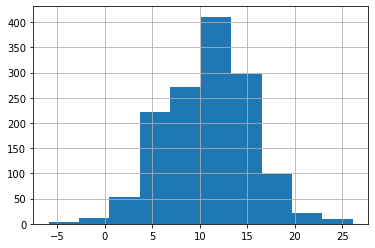

In [5]:
final_df['tweet_web_r'] = final_df.tweet.str.replace(r'http\S+','')
final_df['ARI'] = final_df.tweet_web_r.apply(lambda x:textstat.automated_readability_index(x))
final_df.tweet_web_r.apply(lambda x:textstat.automated_readability_index(x)).hist()

OK now looking at the histgram.  The distrubtion is a lot better consider the index is ranging mostly from 1 - 24.  I think we captured a really good range here.  But lets try another method and see how it looks. 

https://en.wikipedia.org/wiki/Automated_readability_index

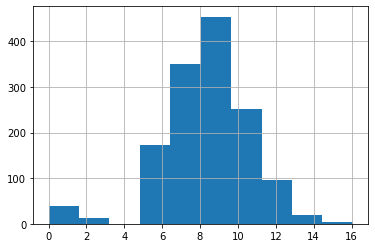

In [6]:
final_df['DCR'] = final_df.tweet_web_r.apply(lambda x:textstat.dale_chall_readability_score(x))
final_df.tweet_web_r.apply(lambda x:textstat.dale_chall_readability_score(x)).hist()

Dale Chall Readiblity formula uses a list of 3000 words that fourth grade american can reliably  understand and using this list to see how difficult the sentence are

https://en.wikipedia.org/wiki/Dale%E2%80%93Chall_readability_formula

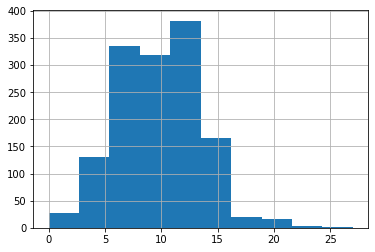

In [7]:
final_df['TS'] = final_df.tweet_web_r.apply(lambda x:textstat.text_standard(x,float_output =True))
final_df.tweet_web_r.apply(lambda x:textstat.text_standard(x,float_output =True)).hist()

The final readability consensus base on all the above test.  Now we quanitfy the readability of these tweet lets see if there is a trend between these politican

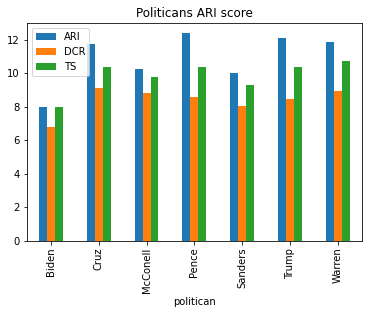

In [8]:
final_df
final_df.groupby('politican')[['ARI','DCR','TS']].mean().plot(kind = 'bar', title = 'Politicans ARI score')

Graphing by their average, it is kind of surprising to see that Trump, has an average performance.  Lets take a deeper dive and see if there is any outlier

In [9]:
final_df.groupby('politican')[['ARI','DCR','TS']].describe()

ARI                                                       DCR  \
           count     mean       std  min    25%    50%    75%   max  count   
politican                                                                    
Biden      200.0   7.9630  4.184397 -4.3  5.075   8.40  11.20  24.0  200.0   
Cruz       200.0  11.7515  4.018637 -1.7  9.075  11.60  14.05  25.4  200.0   
McConell   200.0  10.2495  3.889517  2.8  7.100  10.60  13.50  20.2  200.0   
Pence      200.0  12.3730  4.504311  0.0  9.300  12.65  15.50  25.7  200.0   
Sanders    200.0   9.9845  3.933136  2.2  6.475  10.45  12.40  22.0  200.0   
Trump      200.0  12.1095  4.883760  0.0  8.575  12.50  15.30  26.1  200.0   
Warren     200.0  11.8580  3.991893 -5.9  9.600  12.40  14.80  21.9  200.0   

                    ...                     TS                               \
              mean  ...      75%    max  count    mean       std  min   25%   
politican           ...                                                       
Biden      6.80880  ...   8.1950  14.00  200.0   7.990  3.130319  0.0  6.00   
Cruz       9.11225  ...  10.0500  16.07  200.0  10.350  3.385975  0.0  8.00   
McConell   8.80780  ...  10.0500  13.85  200.0   9.755  3.095624  4.0  7.00   
Pence      8.57520  ...  10.0500  13.44  200.0  10.380  3.969178  0.0  8.00   
Sanders    8.04190  ...   9.3700  13.35  200.0   9.310  3.172416  3.0  7.00   
Trump      8.45245  ...  10.1775  15.19  200.0  10.375  4.339184  0.0  7.75   
Warren     8.96225  ...  10.1750  13.48  200.0  10.710  3.160036  0.0  9.00   

                             
            50%   75%   max  
politican                    
Biden       8.0  10.0  22.0  
Cruz       10.0  12.0  20.0  
McConell   10.0  12.0  20.0  
Pence      10.5  13.0  21.0  
Sanders     9.0  12.0  27.0  
Trump      10.0  13.0  23.0  
Warren     11.0  13.0  20.0  

[7 rows x 24 columns]

In [10]:
final_df.replace('', np.nan,inplace = True)
final_df.dropna(subset = ['tweet_web_r'],inplace = True)
final_df

tweet politican party  \
0     RT @realDonaldTrump: Will be interviewed by @s...     Trump     R   
2     Will be interviewed by @seanhannity tonight at...     Trump     R   
3        WELCOME BACK BASEBALL! https://t.co/dhLSfNkI7L     Trump     R   
4     RT @WhiteHouse: LIVE: President @realDonaldTru...     Trump     R   
5       White House Press Conference at 5:15 P.M. Live!     Trump     R   
...                                                 ...       ...   ...   
1395  Proud to work hand-in-hand with @CDCgov &amp; ...     Pence     R   
1396  RT @SecondLady: #MoreThanEverBefore people are...     Pence     R   
1397  Insightful and thoughtful meeting with @theang...     Pence     R   
1398  Today is a Historic Day for our Nation. The Se...     Pence     R   
1399  RT @WhiteHouse: Today, President @realDonaldTr...     Pence     R   

      retweet                                        tweet_web_r   ARI    DCR  \
0        True  RT @realDonaldTrump: Will be interviewed by @s...  14.5   7.71   
2       False  Will be interviewed by @seanhannity tonight at...  10.9   6.86   
3       False                            WELCOME BACK BASEBALL!   11.5   0.15   
4        True  RT @WhiteHouse: LIVE: President @realDonaldTru...  16.6  11.10   
5       False    White House Press Conference at 5:15 P.M. Live!   6.1   6.01   
...       ...                                                ...   ...    ...   
1395    False  Proud to work hand-in-hand with @CDCgov &amp; ...  16.6   9.79   
1396     True  RT @SecondLady: #MoreThanEverBefore people are...  17.1   9.37   
1397    False  Insightful and thoughtful meeting with @theang...  22.9  12.23   
1398    False  Today is a Historic Day for our Nation. The Se...   9.6   9.93   
1399     True  RT @WhiteHouse: Today, President @realDonaldTr...  21.4  12.84   

        TS  
0      9.0  
2      7.0  
3     12.0  
4     17.0  
5      6.0  
...    ...  
1395  13.0  
1396  15.0  
1397  14.0  
1398  10.0  
1399  13.0  

[1397 rows x 8 columns]

ok only two row is just http so there shouldn't be too much change to the score we get above.  Lets Generate a word cloud and see what word each politican uses

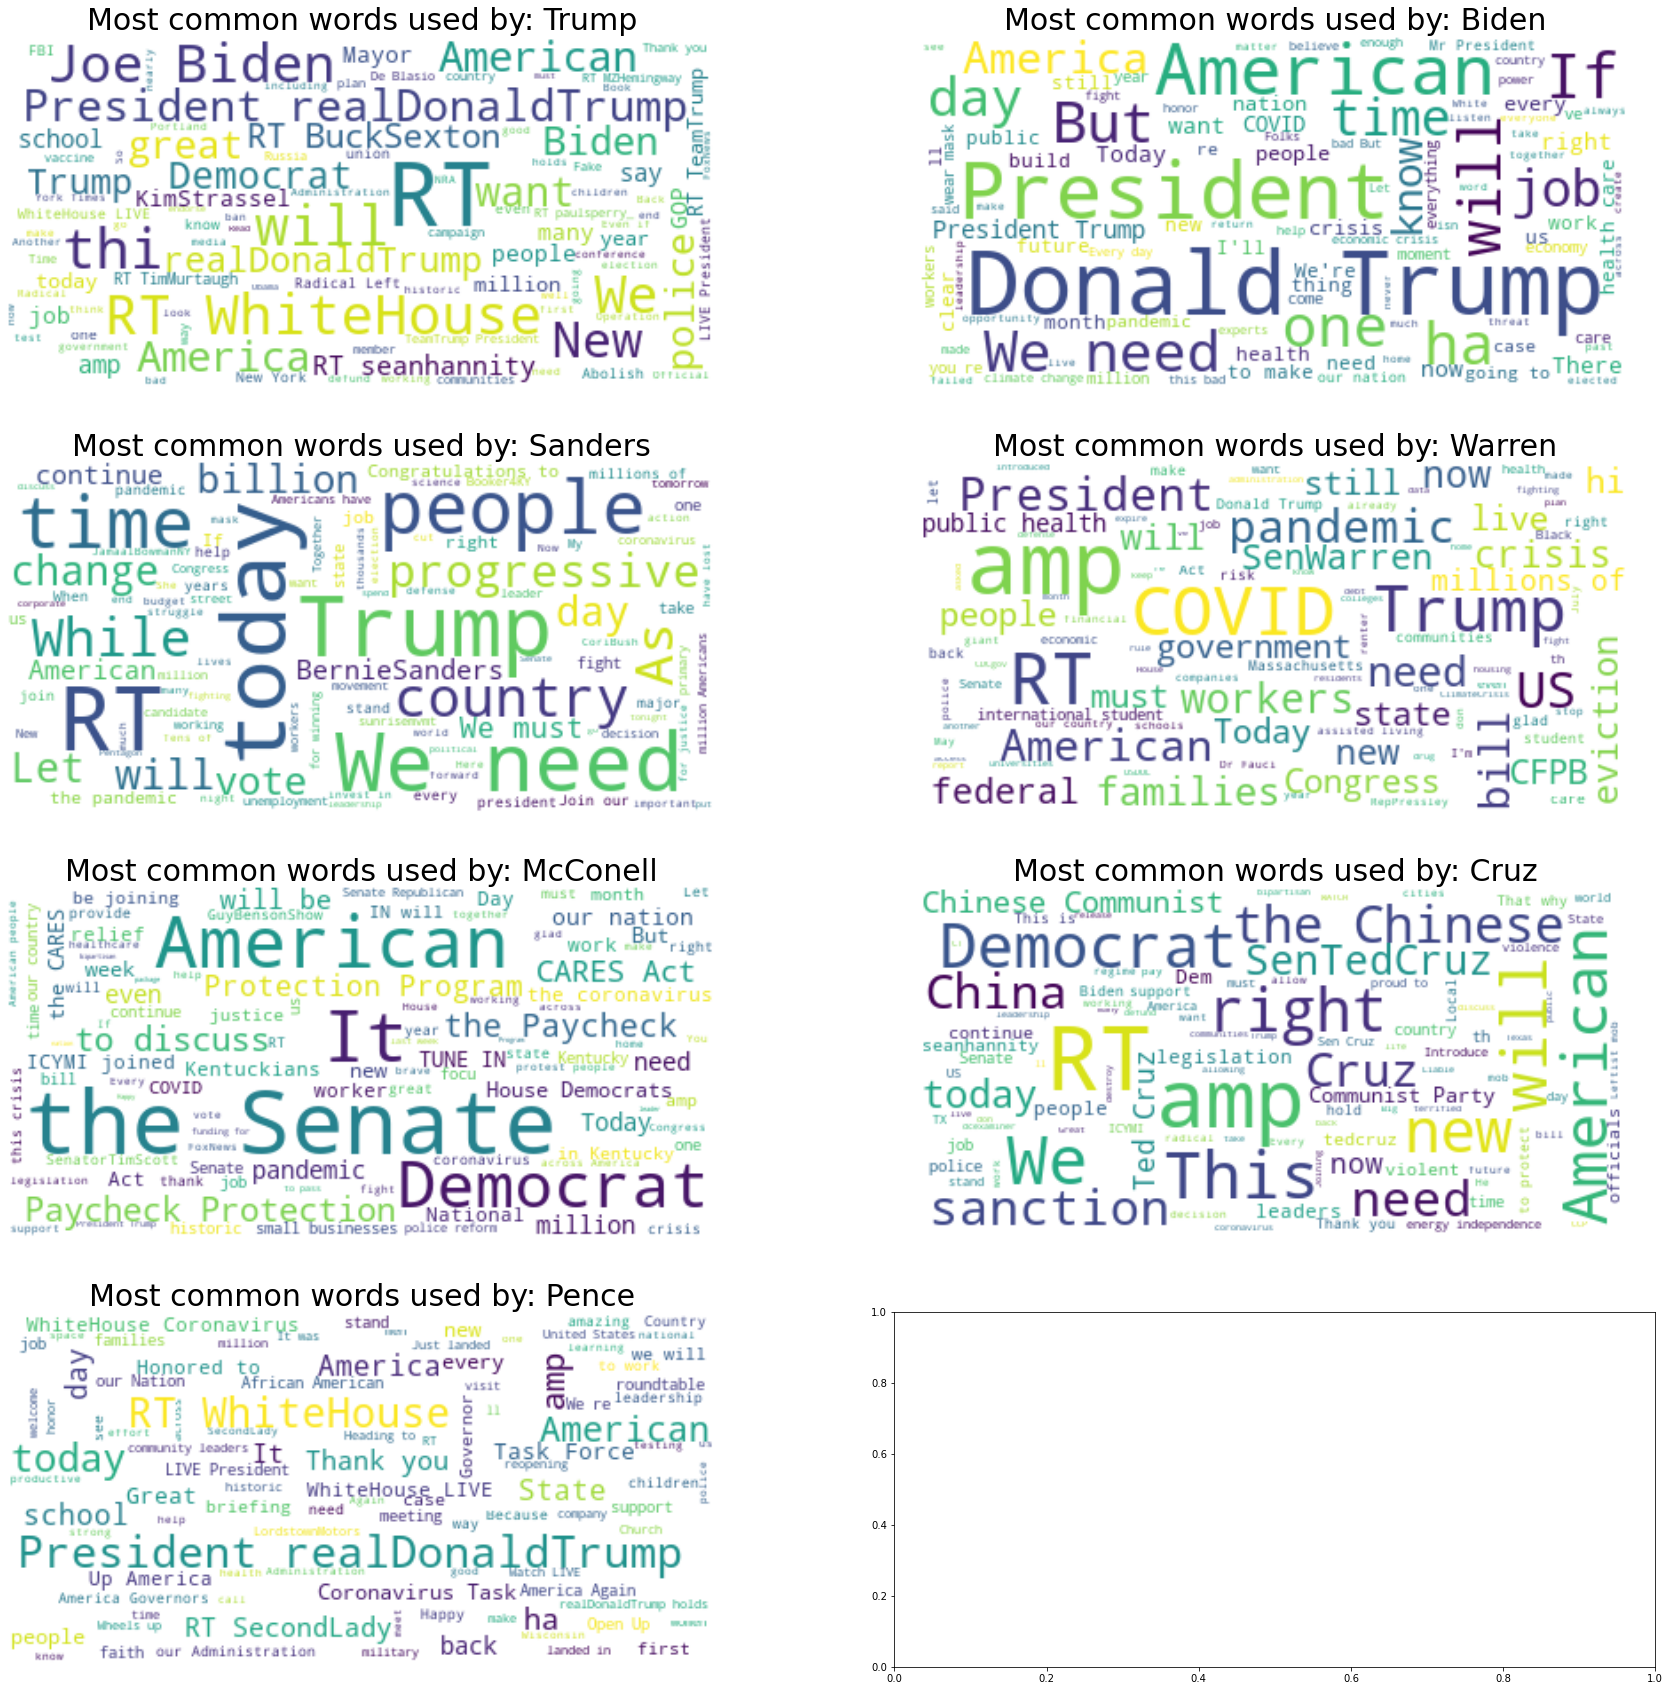

In [11]:
from wordcloud import WordCloud, STOPWORDS , ImageColorGenerator
import matplotlib.pyplot as plt
%matplotlib inline

politican = ['Trump','Biden','Sanders','Warren','McConell','Cruz','Pence']
plot = []
for idx, name in enumerate(politican):
    politican_df = final_df[final_df['politican'] == name] 
    politican_df_tweet = " ".join(review for review in politican_df.tweet_web_r)
    wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(politican_df_tweet)
    plot.append(wordcloud)
 
fig, axs = plt.subplots(4, 2 , figsize  = (30,30))

for i in range(4):
    for j in range(2):
        if i == 3 and j == 1: 
            break 
        axs[i,j].imshow(plot[i*2+j], interpolation='bilinear')
        axs[i,j].axis("off")
        axs[i,j].set_title('Most common words used by: ' +politican[i*2+j],fontsize=30)
        #axs[i,j].show()


Wow this is actually pretty awesome to see how words are used bery differently.  Warren uses Covide and pandamic lot, Cruz uses china and chinese a lot. Interesting here is that Biden and McConell doesn't actually retweet a lot.  Seems like democratic leader critized trump a lot.  Therefore, this model might work in some way

OK now let do additional data cleaning.  Lets start by taking out all the punctions withing the dataframe

In [12]:
import string
import re

pattern = r"[{}]".format(string.punctuation)
#print(pattern + '\'')

#final_df.tweet_web_r  = final_df.tweet_web_r.str.replace(string.punction, '')
final_df['punct'] = final_df.tweet_web_r.str.replace(pattern, '')
final_df.punct

0       RT realDonaldTrump Will be interviewed by sean...
2       Will be interviewed by seanhannity tonight at ...
3                                  WELCOME BACK BASEBALL 
4       RT WhiteHouse LIVE President realDonaldTrump h...
5             White House Press Conference at 515 PM Live
                              ...                        
1395    Proud to work handinhand with CDCgov amp Secre...
1396    RT SecondLady MoreThanEverBefore people are ex...
1397    Insightful and thoughtful meeting with theangi...
1398    Today is a Historic Day for our Nation The Sen...
1399    RT WhiteHouse Today President realDonaldTrump ...
Name: punct, Length: 1397, dtype: object

Now lets tokenized each tweet

In [13]:
import nltk
from nltk.tokenize import word_tokenize

#nltk.download('punkt')

final_df.punct[0].split(' ')
final_df['token'] = final_df.punct.apply(lambda x: word_tokenize(x))
final_df.token

0       [RT, realDonaldTrump, Will, be, interviewed, b...
2       [Will, be, interviewed, by, seanhannity, tonig...
3                               [WELCOME, BACK, BASEBALL]
4       [RT, WhiteHouse, LIVE, President, realDonaldTr...
5       [White, House, Press, Conference, at, 515, PM,...
                              ...                        
1395    [Proud, to, work, handinhand, with, CDCgov, am...
1396    [RT, SecondLady, MoreThanEverBefore, people, a...
1397    [Insightful, and, thoughtful, meeting, with, t...
1398    [Today, is, a, Historic, Day, for, our, Nation...
1399    [RT, WhiteHouse, Today, President, realDonaldT...
Name: token, Length: 1397, dtype: object

ok....  Now lets talk about stop word.  Which are words that are really commonly used in any given language.  I am not sure if I want to remove them just yet..  However, I think it is quite important to count them.

After consideration, we are going to see what does the readability value and word cloud looks like without the retweet

In [14]:
df_noRT = final_df[final_df['retweet'] == False]
df_noRT

tweet politican party  \
2     Will be interviewed by @seanhannity tonight at...     Trump     R   
3        WELCOME BACK BASEBALL! https://t.co/dhLSfNkI7L     Trump     R   
5       White House Press Conference at 5:15 P.M. Live!     Trump     R   
6     The Suburban Housewives of America must read t...     Trump     R   
7     Obama, who wouldn’t even endorse Biden until e...     Trump     R   
...                                                 ...       ...   ...   
1393  HUGE news: The NASDAQ hit an all-time record h...     Pence     R   
1394  TONIGHT at 5PM: Joining @LouDobbs to talk abou...     Pence     R   
1395  Proud to work hand-in-hand with @CDCgov &amp; ...     Pence     R   
1397  Insightful and thoughtful meeting with @theang...     Pence     R   
1398  Today is a Historic Day for our Nation. The Se...     Pence     R   

      retweet                                        tweet_web_r   ARI    DCR  \
2       False  Will be interviewed by @seanhannity tonight at...  10.9   6.86   
3       False                            WELCOME BACK BASEBALL!   11.5   0.15   
5       False    White House Press Conference at 5:15 P.M. Live!   6.1   6.01   
6       False  The Suburban Housewives of America must read t...   9.0   6.71   
7       False  Obama, who wouldn’t even endorse Biden until e...  10.6   8.44   
...       ...                                                ...   ...    ...   
1393    False  HUGE news: The NASDAQ hit an all-time record h...  11.8   6.88   
1394    False  TONIGHT at 5PM: Joining @LouDobbs to talk abou...  14.1   8.73   
1395    False  Proud to work hand-in-hand with @CDCgov &amp; ...  16.6   9.79   
1397    False  Insightful and thoughtful meeting with @theang...  22.9  12.23   
1398    False  Today is a Historic Day for our Nation. The Se...   9.6   9.93   

        TS                                              punct  \
2      7.0  Will be interviewed by seanhannity tonight at ...   
3     12.0                             WELCOME BACK BASEBALL    
5      6.0        White House Press Conference at 515 PM Live   
6      8.0  The Suburban Housewives of America must read t...   
7      9.0  Obama who wouldn’t even endorse Biden until ev...   
...    ...                                                ...   
1393   9.0  HUGE news The NASDAQ hit an alltime record hig...   
1394  11.0  TONIGHT at 5PM Joining LouDobbs to talk about ...   
1395  13.0  Proud to work handinhand with CDCgov amp Secre...   
1397  14.0  Insightful and thoughtful meeting with theangi...   
1398  10.0  Today is a Historic Day for our Nation The Sen...   

                                                  token  
2     [Will, be, interviewed, by, seanhannity, tonig...  
3                             [WELCOME, BACK, BASEBALL]  
5     [White, House, Press, Conference, at, 515, PM,...  
6     [The, Suburban, Housewives, of, America, must,...  
7     [Obama, who, wouldn, ’, t, even, endorse, Bide...  
...                                                 ...  
1393  [HUGE, news, The, NASDAQ, hit, an, alltime, re...  
1394  [TONIGHT, at, 5PM, Joining, LouDobbs, to, talk...  
1395  [Proud, to, work, handinhand, with, CDCgov, am...  
1397  [Insightful, and, thoughtful, meeting, with, t...  
1398  [Today, is, a, Historic, Day, for, our, Nation...  

[1074 rows x 10 columns]

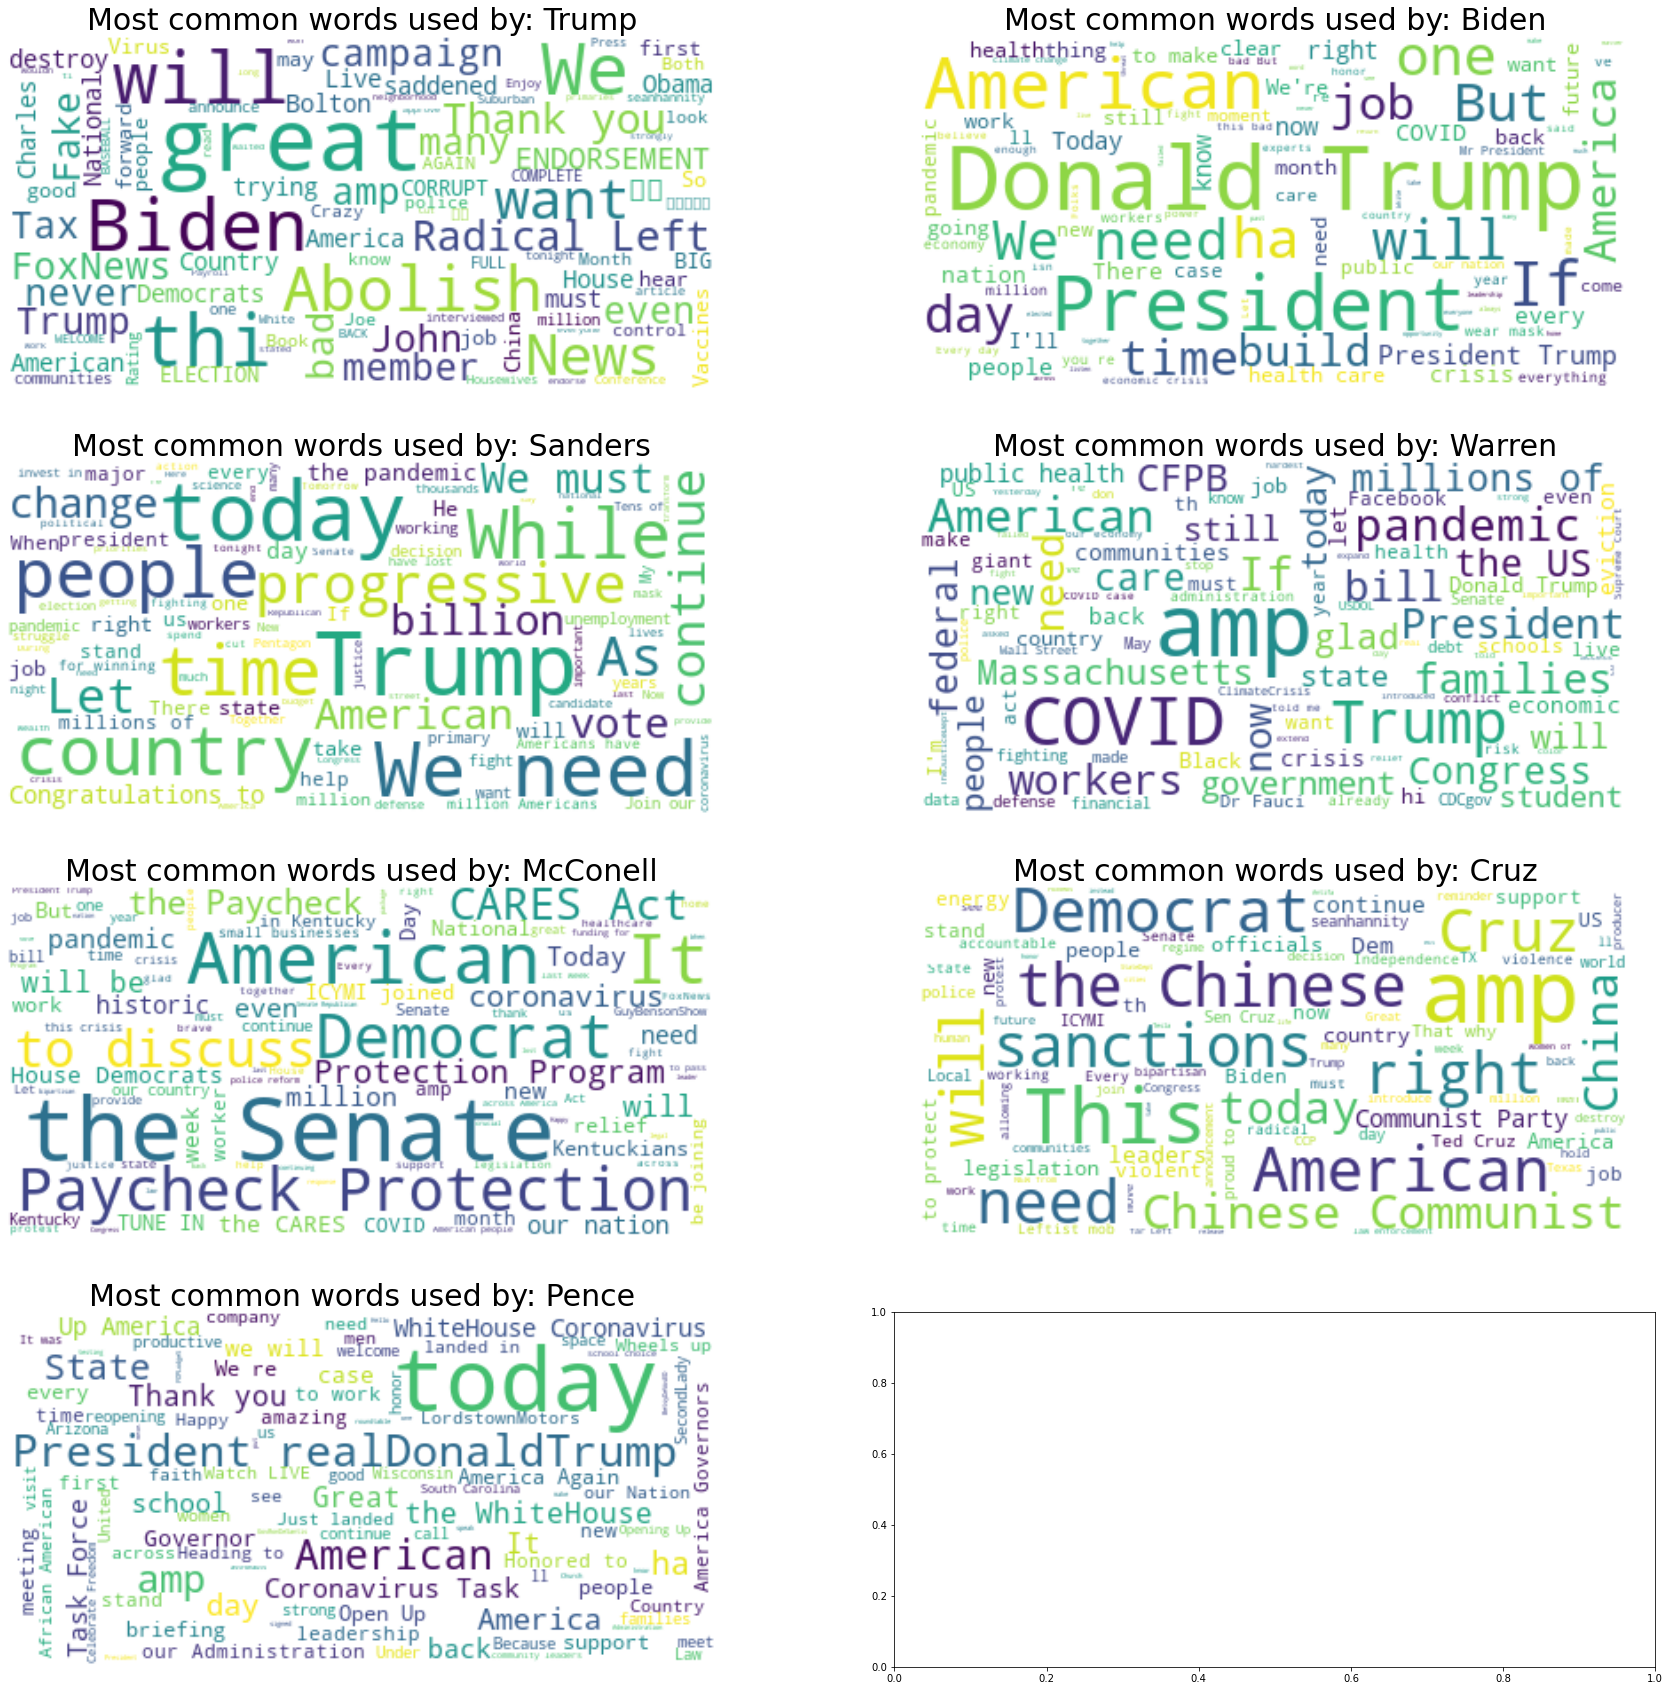

In [15]:
politican = ['Trump','Biden','Sanders','Warren','McConell','Cruz','Pence']
plot = []
### over we found out that Pence doesn't actually tweet.  All he does is retweet himself.... so we actually 
### collect data from wrong twitter account

#politican.remove('Pence')

plot = []
for idx, name in enumerate(politican):
    politican_df = df_noRT[df_noRT['politican'] == name] 
    politican_df_tweet = " ".join(review for review in politican_df.tweet_web_r)
    wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(politican_df_tweet)
    plot.append(wordcloud)
 
fig, axs = plt.subplots(4, 2 , figsize  = (30,30))
for i in range(4):
    for j in range(2):
        if i == 3 and j == 1: 
            break 
        axs[i,j].imshow(plot[i*2+j], interpolation='bilinear')
        axs[i,j].axis("off")
        axs[i,j].set_title('Most common words used by: ' +politican[i*2+j],fontsize=30)
        #axs[i,j].show()

Now we will fix all the readability Value by removing the retweet

C:\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.p

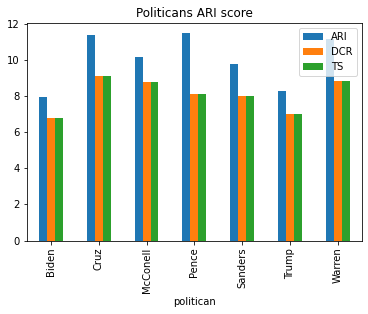

In [16]:
df_noRT['ARI'] = df_noRT.tweet_web_r.apply(lambda x:textstat.automated_readability_index(x))
df_noRT['DCR'] = df_noRT.tweet_web_r.apply(lambda x:textstat.dale_chall_readability_score(x))
df_noRT['TS'] = df_noRT.tweet_web_r.apply(lambda x:textstat.dale_chall_readability_score(x))

df_noRT.groupby('politican')[['ARI','DCR','TS']].mean().plot(kind = 'bar', title = 'Politicans ARI score')

ok now this looks a little  bit different..  and trump ARI has decrease significantly

Now we will remove all the stop word

In [17]:
from nltk.corpus import stopwords

#nltk.download('stopwords')

stop_words = set(stopwords.words('english'))

df_noRT = df_noRT.reset_index(drop=True)
df_noRT['token'] = df_noRT.token.apply(lambda tokens: [w for w in tokens if not w in stop_words])
df_noRT

tweet politican party  \
0     Will be interviewed by @seanhannity tonight at...     Trump     R   
1        WELCOME BACK BASEBALL! https://t.co/dhLSfNkI7L     Trump     R   
2       White House Press Conference at 5:15 P.M. Live!     Trump     R   
3     The Suburban Housewives of America must read t...     Trump     R   
4     Obama, who wouldn’t even endorse Biden until e...     Trump     R   
...                                                 ...       ...   ...   
1069  HUGE news: The NASDAQ hit an all-time record h...     Pence     R   
1070  TONIGHT at 5PM: Joining @LouDobbs to talk abou...     Pence     R   
1071  Proud to work hand-in-hand with @CDCgov &amp; ...     Pence     R   
1072  Insightful and thoughtful meeting with @theang...     Pence     R   
1073  Today is a Historic Day for our Nation. The Se...     Pence     R   

      retweet                                        tweet_web_r   ARI    DCR  \
0       False  Will be interviewed by @seanhannity tonight at...  10.9   6.86   
1       False                            WELCOME BACK BASEBALL!   11.5   0.15   
2       False    White House Press Conference at 5:15 P.M. Live!   6.1   6.01   
3       False  The Suburban Housewives of America must read t...   9.0   6.71   
4       False  Obama, who wouldn’t even endorse Biden until e...  10.6   8.44   
...       ...                                                ...   ...    ...   
1069    False  HUGE news: The NASDAQ hit an all-time record h...  11.8   6.88   
1070    False  TONIGHT at 5PM: Joining @LouDobbs to talk abou...  14.1   8.73   
1071    False  Proud to work hand-in-hand with @CDCgov &amp; ...  16.6   9.79   
1072    False  Insightful and thoughtful meeting with @theang...  22.9  12.23   
1073    False  Today is a Historic Day for our Nation. The Se...   9.6   9.93   

         TS                                              punct  \
0      6.86  Will be interviewed by seanhannity tonight at ...   
1      0.15                             WELCOME BACK BASEBALL    
2      6.01        White House Press Conference at 515 PM Live   
3      6.71  The Suburban Housewives of America must read t...   
4      8.44  Obama who wouldn’t even endorse Biden until ev...   
...     ...                                                ...   
1069   6.88  HUGE news The NASDAQ hit an alltime record hig...   
1070   8.73  TONIGHT at 5PM Joining LouDobbs to talk about ...   
1071   9.79  Proud to work handinhand with CDCgov amp Secre...   
1072  12.23  Insightful and thoughtful meeting with theangi...   
1073   9.93  Today is a Historic Day for our Nation The Sen...   

                                                  token  
0     [Will, interviewed, seanhannity, tonight, 900,...  
1                             [WELCOME, BACK, BASEBALL]  
2      [White, House, Press, Conference, 515, PM, Live]  
3     [The, Suburban, Housewives, America, must, rea...  
4     [Obama, ’, even, endorse, Biden, everyone, els...  
...                                                 ...  
1069  [HUGE, news, The, NASDAQ, hit, alltime, record...  
1070  [TONIGHT, 5PM, Joining, LouDobbs, talk, Admini...  
1071  [Proud, work, handinhand, CDCgov, amp, Secreta...  
1072  [Insightful, thoughtful, meeting, theangiestan...  
1073  [Today, Historic, Day, Nation, The, Senate, co...  

[1074 rows x 10 columns]

Ok now for our last step we will perform stemming and lemming

In [19]:
from nltk.stem import WordNetLemmatizer 
#nltk.download('wordnet')
lemmatizer = WordNetLemmatizer() 
df_noRT['lem_token'] = df_noRT.token.apply(lambda tokens: [lemmatizer.lemmatize(w) for w in tokens])
df_noRT

df_noRT.to_csv(one_level_up + '\\data\\processed\\processed_tweets.csv')